# Real estate for rent in Brasil

Our main goal is to predict prices as function of other factors


*Data downloaded from Kaggle*
*https://www.kaggle.com/devvret/brazil-real-estate-listings/data*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data=pd.read_csv('./properati-real-estate-listings-brazil/data/properati_br_2016_11_01_properties_rent.csv')

In [3]:
raw_data.head()

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat_lon,lat,lon,price,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,location
0,2013-04-25,rent,apartment,Praia Grande,|Brasil|São Paulo|Praia Grande|,NaN,NaN,NaN,NaN,900.0,...,NaN,NaN,NaN,1.0,NaN,http://praia-grande-sao-paulo.properati.com.br...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Praia Grande,NaN,NaN
1,2013-04-25,rent,apartment,Alphaville,|Brasil|São Paulo|Barueri|Alphaville|,NaN,NaN,NaN,NaN,3200.0,...,NaN,NaN,NaN,3.0,NaN,http://alphaville-barueri.properati.com.br/q8z...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Barueri,https://thumbs-cf.properati.com/0/Wjq7toq-DpwK...,NaN
2,2013-04-25,rent,house,Centro,|Brasil|São Paulo|Jundiaí|Centro|,NaN,NaN,NaN,NaN,1800.0,...,NaN,NaN,NaN,2.0,NaN,http://centro-jundiai.properati.com.br/qe2_alu...,"Otimo Imovel com o melhor valor da regiao, con...",Casa Em Jundiai,NaN,NaN
3,2013-04-25,rent,apartment,Alphaville,|Brasil|São Paulo|Barueri|Alphaville|,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,http://alphaville-barueri.properati.com.br/s9p...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Barueri,https://thumbs-cf.properati.com/0/X7PtsZjj8Vqz...,NaN
4,2013-04-25,rent,apartment,Barueri,|Brasil|São Paulo|Barueri|,NaN,NaN,NaN,NaN,1800.0,...,NaN,NaN,NaN,NaN,NaN,http://barueri.properati.com.br/s9u_aluga-se_a...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Barueri,https://thumbs-cf.properati.com/9/URn3U3gg-F6C...,NaN


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97353 entries, 0 to 97352
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   created_on                  97353 non-null  object 
 1   operation                   97353 non-null  object 
 2   property_type               97353 non-null  object 
 3   place_name                  97353 non-null  object 
 4   place_with_parent_names     97353 non-null  object 
 5   geonames_id                 3 non-null      float64
 6   lat_lon                     46030 non-null  object 
 7   lat                         46030 non-null  float64
 8   lon                         46030 non-null  float64
 9   price                       92334 non-null  float64
 10  currency                    92333 non-null  object 
 11  price_aprox_local_currency  92334 non-null  float64
 12  price_aprox_usd             92334 non-null  float64
 13  surface_total_in_m2         158

In [5]:
#raw_data['expenses'].isnull().count()
raw_data['expenses'].count()

31773

In [6]:
df1=raw_data[['created_on','operation', 'property_type', 'price', 'rooms','place_name', 'place_with_parent_names']].dropna()

In [7]:
df1.tail()

,created_on,operation,property_type,price,rooms,place_name,place_with_parent_names
97345,2016-10-31,rent,house,1500.0,1.0,Rio das Pedras,|Brasil|São Paulo|Rio das Pedras|
97346,2016-10-31,rent,apartment,1900.0,1.0,Parque Residencial Aquarius,|Brasil|São Paulo|São José dos Campos|Parque R...
97347,2016-10-31,rent,house,2000.0,2.0,Vila Carrão,|Brasil|São Paulo|São Paulo|Vila Carrão|
97351,2016-11-01,rent,apartment,900.0,1.0,Votorantim,|Brasil|São Paulo|Votorantim|
97352,2016-11-01,rent,apartment,1800.0,1.0,Copacabana,|Brasil|Rio de Janeiro|Rio de Janeiro|Copacabana|


###Questions to be answered:
-> Is the price dependent of the operation, nº rooms city , apartment type?

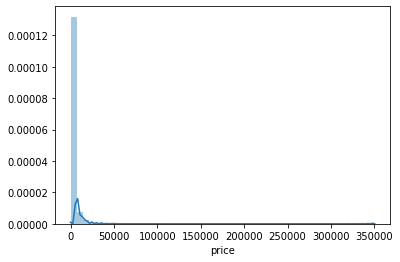

In [8]:
sns.distplot(df1['price'])

In [9]:
df1['price'].describe()

count     55208.000000
mean       3200.995852
std        7477.585527
min         180.000000
25%        1100.000000
50%        1800.000000
75%        3200.000000
max      350000.000000
Name: price, dtype: float64

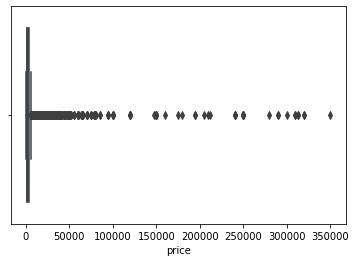

In [10]:
sns.boxplot('price', hue='property_type', data=df1)

Conclusions: About 80% of the properties are under 5000 r / 20% have very high values

In [11]:
df1[df1['price'] <=5000]['price'].count()/len(df1['price'])

0.8746015070279669

In [12]:
df1['operation'].value_counts()

rent    55208
Name: operation, dtype: int64

All properties are for rental.

In [13]:
df1['property_type'].value_counts()/len(df1['property_type'])*100

apartment    63.883857
house        22.587306
store        12.663020
PH            0.865817
Name: property_type, dtype: float64

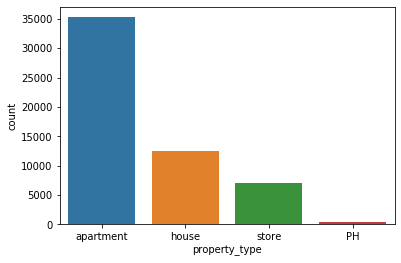

In [14]:
sns.countplot(data=df1, x='property_type')

Most properties are apartments, then houses and stores and PH

In [15]:
df1.groupby(['property_type']).mean()

,price,rooms
property_type,,
PH,2999.790795,2.960251
apartment,3017.089625,2.104341
house,3653.385806,2.338172
store,3335.606351,1.849664


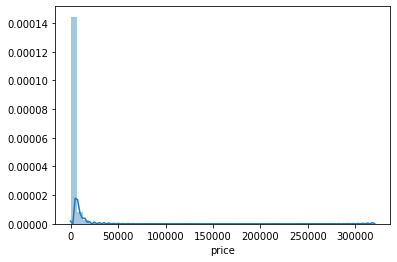

In [16]:
sns.distplot(df1[df1['property_type']=='apartment']['price'])

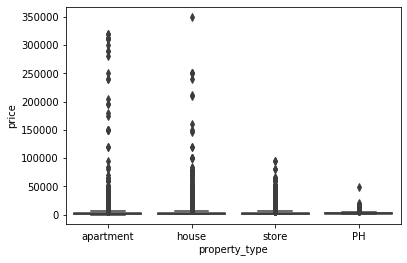

In [17]:
sns.boxplot(x='property_type', y='price', data=df1)

It seems that high prices (>5000) exist in all of kinds of properties. PH properties are the cheapest.
Is the price most dependent of location?

In [18]:
df1['City']=df1['place_with_parent_names'].str.split('|').str[2]

In [19]:
df1['City'].value_counts()

São Paulo              47742
Rio de Janeiro          1938
Minas Gerais            1347
Paraná                  1290
Bahia                    437
Distrito Federal         352
Ceará                    339
Paraíba                  314
Santa Catarina           239
Pernambuco               198
Rio Grande do Norte      167
Rio Grande do Sul        142
Espírito Santo           118
Goiás                    101
Mato Grosso               90
Maranhão                  83
Pará                      79
Tocantins                 74
Amazonas                  42
Sergipe                   37
Mato Grosso do Sul        28
Piauí                     25
Amapá                     14
Alagoas                    9
Rondônia                   2
Acre                       1
Name: City, dtype: int64

In [20]:
df2=df1.groupby('City', as_index=False).mean()

In [21]:
df2.sort_values('price', ascending=False)

,City,price,rooms
20,Rio de Janeiro,5178.069659,3.035088
19,Rio Grande do Sul,4633.239437,1.436620
4,Bahia,3441.816934,2.411899
15,Pará,3371.012658,1.746835
3,Amazonas,3318.095238,2.380952
16,Pernambuco,3289.924242,1.727273
24,São Paulo,3232.568933,2.086549
12,Minas Gerais,2374.362287,2.067558
18,Rio Grande do Norte,2087.808383,1.652695
13,Paraná,2074.641860,2.305426


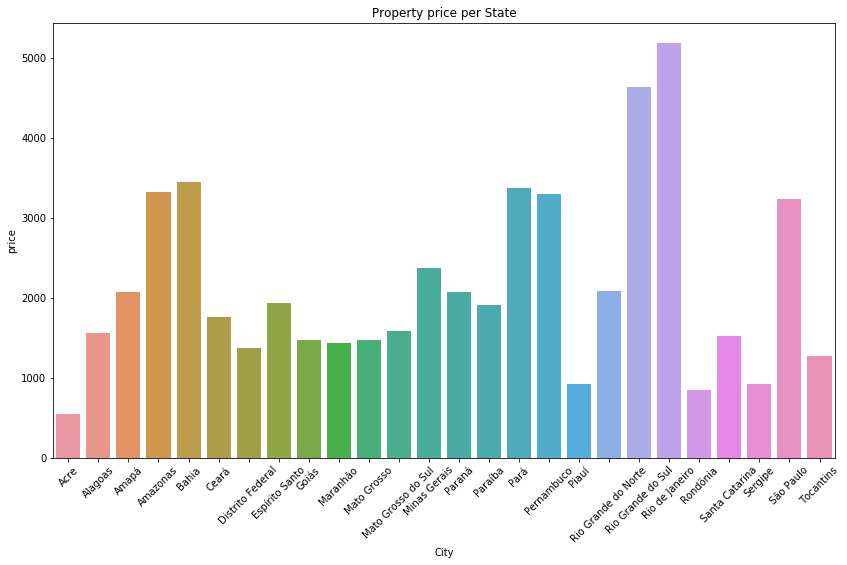

In [22]:
plt.figure(figsize=(14,8))
plt.xticks(rotation=45)
plt.title("Property price per State")


sns.barplot(data=df2, x='City', y='price')

Let's evaluate house prices for Rio de Janeiro

In [23]:
rj=df1[df1['City']=='Rio de Janeiro']

In [24]:
rj['apartment']=pd.get_dummies(rj['property_type']=="apartment")[1]
#pd.get_dummies(
#rj

/home/barbara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
rj['house']=pd.get_dummies(rj['property_type']=="house")[1]

/home/barbara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
rj['store']=pd.get_dummies(rj['property_type']=="store")[1]

/home/barbara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
rj['PH']=pd.get_dummies(rj['property_type']=="PH")[1]

/home/barbara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
rj['age']=rj['created_on'].str.split('-').str[0].astype(int).apply(lambda x: 2020-x)

/home/barbara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
rj

,created_on,operation,property_type,price,rooms,place_name,place_with_parent_names,City,apartment,house,store,PH,age
148,2013-09-13,rent,apartment,3500.0,1.0,Barra da Tijuca,|Brasil|Rio de Janeiro|Rio de Janeiro|Barra da...,Rio de Janeiro,1,0,0,0,7
512,2013-12-05,rent,apartment,4500.0,3.0,Macaé,|Brasil|Rio de Janeiro|Macaé|,Rio de Janeiro,1,0,0,0,7
709,2013-12-06,rent,house,3000.0,3.0,Macaé,|Brasil|Rio de Janeiro|Macaé|,Rio de Janeiro,0,1,0,0,7
909,2013-12-07,rent,apartment,2800.0,3.0,Angra dos Reis,|Brasil|Rio de Janeiro|Angra dos Reis|,Rio de Janeiro,1,0,0,0,7
1224,2014-02-08,rent,house,5800.0,4.0,Macaé,|Brasil|Rio de Janeiro|Macaé|,Rio de Janeiro,0,1,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97081,2016-10-30,rent,apartment,1590.0,7.0,Barra da Tijuca,|Brasil|Rio de Janeiro|Rio de Janeiro|Barra da...,Rio de Janeiro,1,0,0,0,4
97212,2016-10-30,rent,apartment,2000.0,6.0,Barra da Tijuca,|Brasil|Rio de Janeiro|Rio de Janeiro|Barra da...,Rio de Janeiro,1,0,0,0,4
97279,2016-10-31,rent,apartment,3400.0,1.0,Copacabana,|Brasil|Rio de Janeiro|Rio de Janeiro|Copacabana|,Rio de Janeiro,1,0,0,0,4
97280,2016-10-31,rent,apartment,7800.0,2.0,Ipanema,|Brasil|Rio de Janeiro|Rio de Janeiro|Ipanema|,Rio de Janeiro,1,0,0,0,4


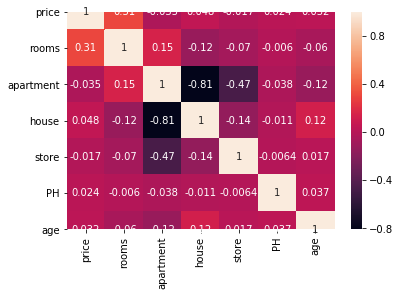

In [30]:
rj.corr()
#Just to check that #rooms and apartment type aren 't colinear
sns.heatmap(rj.corr(), annot=True )

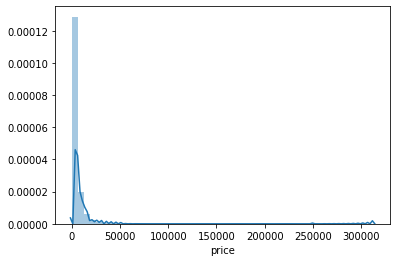

In [31]:
sns.distplot(rj['price'])

In [32]:
len(rj[rj['price']<=9000])/len(rj['price'])

0.8777089783281734

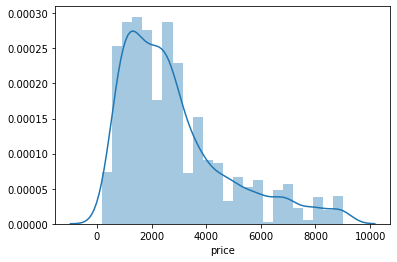

In [33]:
sns.distplot(rj[rj['price']<=9000]['price'])

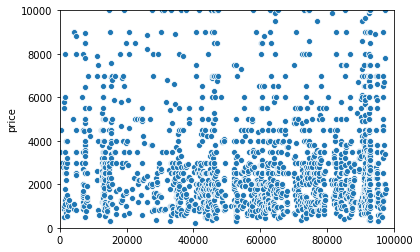

In [34]:
plt.figure()
plt.axis([0, 100000,0,10000])
sns.scatterplot(y=rj['price'], x=rj['price'].index)

87% of the values are under 9000 reais, therefore values over 9000 will excluded

## Linear multiple regression

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
tmp_9=rj[rj['price']<=7000]
y=tmp_9['price']
X=tmp_9[['rooms','apartment', 'house', 'PH', 'store', 'age']]


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1903)

In [39]:
lm=LinearRegression()

In [40]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
lm.intercept_

959.8440820786464

In [42]:
pd.DataFrame(lm.coef_,['rooms','apartment', 'house', 'PH', 'store', 'age'], columns=["Coefficient"])

,Coefficient
rooms,1.401004e+02
apartment,3.387758e+02
house,-8.667268e+01
PH,5.684342e-14
store,-2.521031e+02
age,2.501040e+02


### Interpretation of the coefficients

On average, *ceteris paribus* (keeping everything else contant):

An extra room in the property increases the price by 140 R$.


If the property is an apartment the price increases ~ by 339 R$.


If the property is a house the price decrases by ~ 87 R$.


If the property is a PH , it does not influence the price.


If the property is a store, the price decrases by ~ 25 R$.


If the age increases 1 year, the price increases by ~ 25 R$.




In [43]:
y_pred=lm.predict(X_train)

In [44]:
from sklearn.metrics import r2_score

In [45]:
r2_score(y_pred, y_train)

-8.392819100226925

In [47]:
#Calculate stderror of the estimate and of the coefficients and stuff
#stderr sigma^2 hat

residuals=y_train-y_pred
stderr=np.sqrt(np.sum(residuals**2)/len(y_train)-2)

#np.power()
def calc_stderr_coef(x_vals, stderr):
    dev=list(map(lambda x: np.power(x-np.average(x_vals),2), x_vals))
    return stderr/np.sqrt(np.sum(dev))

feat=['rooms','apartment', 'house','PH', 'store', 'age']
for f in feat:
    print('{} {:.4f}'.format(f, calc_stderr_coef(X_train[f], stderr)))
    


rooms 16.2734
apartment 112.0746
house 124.9784
PH inf
store 198.4532
age 97.5620


/home/barbara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [48]:
import statsmodels.api as sm

In [49]:
N=len(X_train)
p=len(X_train.columns)+1
X_with_intercept=np.empty(shape=(N,p), dtype=np.float)
X_with_intercept[:,0]=1
X_with_intercept[:,1:p]=X_train.values
ols=sm.OLS(y_train.values,X_train.values)
ols_result=ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     25.76
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           2.58e-20
Time:                        16:26:34   Log-Likelihood:                -8496.8
No. Observations:                 973   AIC:                         1.700e+04
Df Residuals:                     968   BIC:                         1.703e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           140.1004     16.498      8.492      0.000     107.724     172.477
x2          1298.6199    422.789      3.072      0.002     468.932    2128.308
x3           873.1714    447.042      1.953      0.051      -4.113    1750.455
const       1.779e-13   8.38e-14      2.122      0.034    1.34e-14    3.42e-13
x4           707.7410    466.234      1.518      0.129    -207.205    1622.687
x5           250.1040     98.685      2.534      0.011      56.443     443.765
==============================================================================
Omnibus:                      126.372   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.582
Skew:                           0.983   Prob(JB):                     7.46e-39
Kurtosis:                       3.682   Cond. No.                     1.58e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.08e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#yeah... some stderr values calculated before don't match the results of statsmodels...
#To be checked later

In [50]:
from sklearn import metrics

In [53]:
print ('Mean squared error {:.4f}'.format(metrics.mean_squared_error(y_pred, y_train)))
print ('Mean absolute error: {:.4f}'.format(metrics.mean_absolute_error(y_pred, y_train)))
print ('RMSE: {:.4f}'.format(np.sqrt(metrics.mean_squared_error(y_pred, y_train))))


Mean squared error 2251791.9606
Mean absolute error: 1172.6010
RMSE: 1500.5972
